![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

# Callysto’s Weekly Data Visualization

## Health Data

### Recommended Grade levels: 6-12
<br>

### Instructions
#### “Run” the cells to see the graphs
Click “Cell” and select “Run All”.<br> This will import the data and run all the code, so you can see this week's data visualization. Scroll to the top after you’ve run the cells.<br> 

![instructions](https://github.com/callysto/data-viz-of-the-week/blob/main/images/instructions.png?raw=true)

**You don’t need to do any coding to view the visualizations**.
The plots generated in this notebook are interactive. You can hover over and click on elements to see more information. 

Email contact@callysto.ca if you experience issues.

### About this Notebook

Callysto's Weekly Data Visualization is a learning resource that aims to develop data literacy skills. We provide Grades 5-12 teachers and students with a data visualization, like a graph, to interpret. This companion resource walks learners through how the data visualization is created and interpreted by a data scientist. 

The steps of the data analysis process are listed below and applied to each weekly topic.

1. Question - What are we trying to answer? 
2. Gather - Find the data source(s) you will need. 
3. Organize - Arrange the data, so that you can easily explore it. 
4. Explore - Examine the data to look for evidence to answer the question. This includes creating visualizations. 
5. Interpret - Describe what's happening in the data visualization. 
6. Communicate - Explain how the evidence answers the question. 

# Question

How do the measurements in the supplied dataset compare to those in the classroom?

### Goal
Our goal is to investigate an accessible type of data (body measurements) and compare it against at least one other set of the same measurements. 

- How are the datasets similar? 
- How are they different? 
- What could be a cause of the differences?
- Is there anything in the data that's surprising or sticks out?

# Gather

### Code:
The code below will import the Python programming libraries we need to gather and organize the data to answer our question.

In [18]:
## import libraries
import pandas as pd
import plotly.express as px
import numpy as np

### Data:

We're going to collect the data from two different sources. The links below are to the files themselves, but to save time they've already been downloaded and are accessed in the next step

- [National Health and Nutrition Examination Survey (NHANES) Body Measurement](https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Examination&Cycle=2017-2020)
- [National Health and Nutrition Examination Survey (NHANES) Blood Pressure](https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_BPXO.XPT)

The data that we're looking at in particular is taken from several thousand American children and adults. For each person, we have [systolic and diastolic blood pressure measurements](https://www.heartandstroke.ca/heart-disease/risk-and-prevention/condition-risk-factors/high-blood-pressure), as well as [resting heart rate](https://www.heartandstroke.ca/heart-disease/what-is-heart-disease/how-a-healthy-heart-works). All measurements were recorded three times (Why?).

### Import the data

In [50]:
## import data
nhanesDataHt = pd.read_sas('data/P_BMX.XPT')[['SEQN','BMXHT']]
nhanesDataBp = pd.read_sas('data/P_BPXO.XPT')[['SEQN', 
                                               'BPXOSY1', 
                                               'BPXOSY2', 
                                               'BPXOSY3', 
                                               'BPXODI1', 
                                               'BPXODI2', 
                                               'BPXODI3', 
                                               'BPXOPLS1', 
                                               'BPXOPLS2', 
                                               'BPXOPLS3']]

### Comment on the data
We have two datasets from the NHANES, one containing data about height, and the other containing data about blood pressure and heart rate. The datasets contain far more data than we actually need, so in the same step that we import the data, we've also only selected the columns that we need and discarded the rest. However, the names of the columns aren't very descriptive.

# Organize

Now that we have the data in our program, we can make some changes to it to make our analysis easier. The first step we're going to do is to rename our columns, as the coding given to them by the researchers that originally collected the data isn't very helpful. Thankfully, along with the data, the researchers also published a 'data dictionary' that helps us convert the codes into something more helpful.

In [64]:
# Data cleaning
anthNames = {
    'SEQN': 'ID', 
    'BMXHT': 'Height (cm)'}
bpNames = { 
    'SEQN' : 'ID',
    'BPXOSY1' : 'Systolic BP (1st reading)',
    'BPXOSY2' : 'Systolic BP (2nd reading)',
    'BPXOSY3' : 'Systolic BP (3rd reading)',
    'BPXODI1' : 'Diastolic BP (1st reading)',
    'BPXODI2' : 'Diastolic BP (2nd reading)',
    'BPXODI3' : 'Diastolic BP (3rd reading)',
    'BPXOPLS1' : 'Heart rate (1st reading)',
    'BPXOPLS2' : 'Heart rate (2nd reading)',
    'BPXOPLS3' : 'Heart rate (3rd reading)'
}
nhanesDataHt.rename(anthNames, axis=1, inplace=True)
nhanesDataBp.rename(bpNames, axis=1, inplace=True)

We also have to take another step to organize our blood pressure data so that we can more easily plot it. Instead of 

In [65]:


display(nhanesDataHt)
display(nhanesDataBp)

,ID,Height (cm)
0,109263.0,NaN
1,109264.0,154.7
2,109265.0,89.3
3,109266.0,160.2
4,109269.0,NaN
...,...,...
14295,124818.0,168.7
14296,124819.0,93.7
14297,124820.0,123.3
14298,124821.0,176.4


,ID,Systolic BP (1st reading),Systolic BP (2nd reading),Systolic BP (3rd reading),Diastolic BP (1st reading),Diastolic BP (2nd reading),Diastolic BP (3rd reading),Heart rate (1st reading),Heart rate (2nd reading),Heart rate (3rd reading)
0,109264.0,109.0,109.0,106.0,67.0,68.0,66.0,94.0,95.0,91.0
1,109266.0,99.0,99.0,99.0,56.0,55.0,52.0,68.0,66.0,66.0
2,109270.0,123.0,124.0,127.0,73.0,77.0,70.0,95.0,98.0,93.0
3,109271.0,102.0,108.0,111.0,65.0,68.0,68.0,73.0,71.0,70.0
4,109273.0,116.0,110.0,115.0,68.0,66.0,68.0,71.0,70.0,70.0
...,...,...,...,...,...,...,...,...,...,...
11651,124815.0,141.0,138.0,141.0,87.0,86.0,87.0,56.0,56.0,58.0
11652,124817.0,111.0,112.0,113.0,69.0,67.0,66.0,70.0,70.0,72.0
11653,124818.0,106.0,108.0,95.0,67.0,65.0,70.0,120.0,119.0,118.0
11654,124821.0,121.0,122.0,129.0,66.0,67.0,67.0,60.0,61.0,61.0


### Comment on the data
Now it should be more clear what exactly the data represents. We can also see that for the first dataset of heights, we have 14,300 observations, whereas the second dataset of blood pressures and heart rates is a little less at 11,656.

# Explore

The code below will be used to help us look for evidence to answer our question. This can involve looking at data in table format, applying math and statistics, and creating different types of visualizations to represent our data.

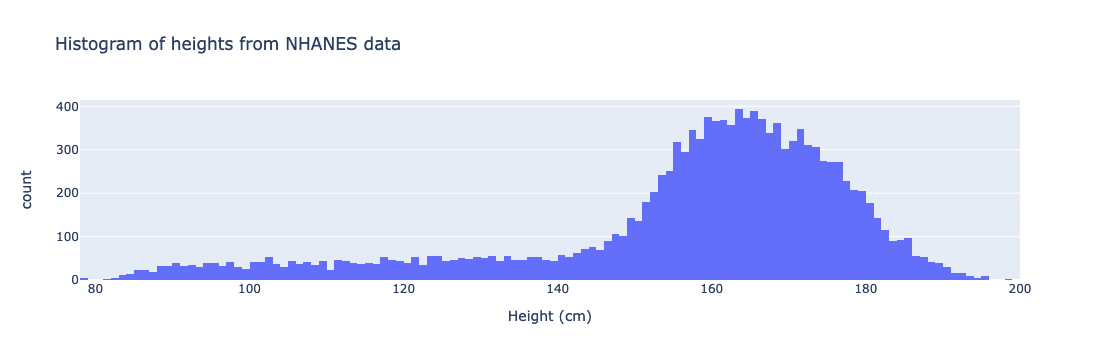

In [60]:
# Height data
fig = px.histogram(nhanesDataHt, 
                   x='Height (cm)',
                   title='Histogram of heights from NHANES data')
fig.show()

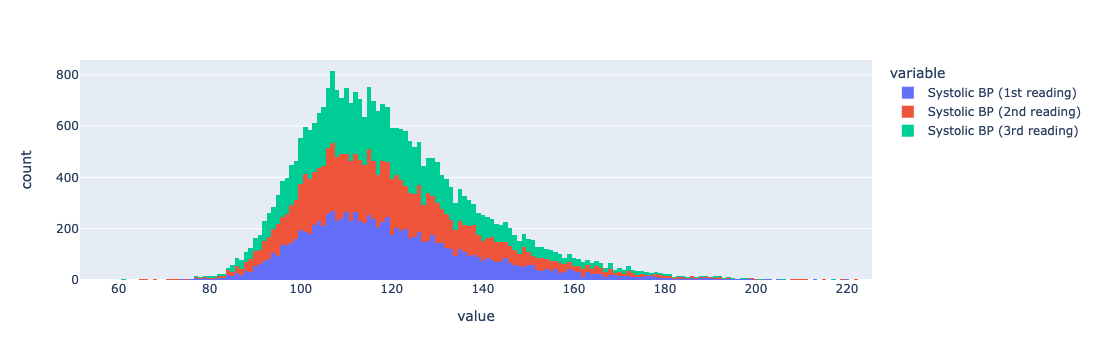

In [63]:
# Blood pressure data
fig = px.histogram(nhanesDataBp,
                   x=['Systolic BP (1st reading)', 'Systolic BP (2nd reading)', 'Systolic BP (3rd reading)'])
fig.show()

# Interpret
(Cycle between Explore and Interpret)<br>
(Describe what’s happening in the data visualization (graph). What do you notice? For example, big or small values, or trends.)

# Communicate
Below we will discuss the results of the data exploration.
(How does our key evidence help answer our question?)

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)